In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import denn.utils as utils
import numpy as np

In [73]:
# fnames = ['../../results/csvs/nlo_GAN_niters.csv', '../../results/csvs/nlo_L2_niters.csv',
#           '../../results/csvs/sho_GAN_hypertune_niters.csv', 
#           '../../results/csvs/sho_L2_hypertune_niters.csv']
sho_fnames = ['../../experiments/csvs/sho_GAN_niters_20reps_from_biggest.csv',
              '../../experiments/csvs/sho_L2_niters_20rep_60by2.csv']

In [74]:
dfs = []
for f in sho_fnames:
    dfs.append(
        pd.read_csv(f, index_col=0)
    )

In [75]:
from IPython.display import display
for d in dfs:
    display(d.head())

,mse,hypers
0,"[0.17484891414642334, 0.16073854267597198, 0.2...","{'gan_niters': 1000, 'gan_gamma': 0.999, 'disc..."
1,"[0.08091077208518982, 0.001273106667213142, 0....","{'gan_niters': 2000, 'gan_gamma': 0.999, 'disc..."
2,"[1.660758425714448e-05, 2.070787786578876e-06,...","{'gan_niters': 5000, 'gan_gamma': 0.999, 'disc..."
3,"[2.818130269588437e-06, 4.380001250581245e-09,...","{'gan_niters': 10000, 'gan_gamma': 0.999, 'dis..."
4,"[3.1628173413622562e-09, 2.5486093235826957e-0...","{'gan_niters': 20000, 'gan_gamma': 0.999, 'dis..."


,mse,hypers
0,"[0.13042812049388885, 0.06417343020439148, 0.1...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,"[0.03315220773220062, 0.006466000806540251, 0....","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
2,"[4.086726221430581e-06, 1.0136152468476212e-06...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
3,"[2.232506624011421e-08, 2.667156877578236e-07,...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
4,"[1.0755265122952551e-07, 4.530007657876922e-08...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."


In [78]:
for d in dfs:
    d.mse = d.mse.apply(eval) # convert string to list

In [85]:
for d in dfs:
    d['mse_top'] = d.mse.apply(lambda x: np.sort(x)[:10])

In [86]:
for d in dfs:
    d['mse_mean'] = d.mse_top.apply(np.mean)
    d['mse_std'] = d.mse_top.apply(np.std)

In [87]:
niters = [1000, 2000, 5000, 10000, 20000]

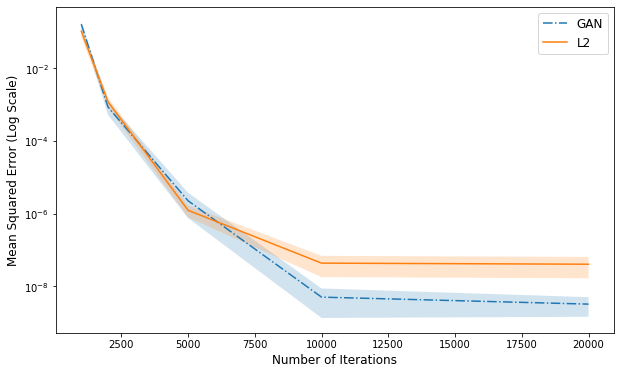

In [100]:
plt.figure(figsize=(10,6))
plt.plot(niters, dfs[0].mse_mean, '-.', label='GAN')
plt.fill_between(niters, dfs[0].mse_mean - dfs[0].mse_std, dfs[0].mse_mean + dfs[0].mse_std, alpha=0.2)
plt.plot(niters, dfs[1].mse_mean, label='L2')
plt.fill_between(niters, dfs[1].mse_mean - dfs[1].mse_std, dfs[1].mse_mean + dfs[1].mse_std, alpha=0.2)
plt.ylabel('Mean Squared Error (Log Scale)')
plt.xlabel('Number of Iterations')
plt.legend(loc='upper right')
plt.yscale('log')
plt.savefig('../../results/imgs/sho_gan_vs_l2_niters.png')

In [29]:
newfs = ['../../results/csvs/sho_GAN_niters.csv', 
         '../../results/csvs/sho_L2_niters.csv']

In [30]:
newdfs = []
for f in newfs:
    newdfs.append(
        pd.read_csv(f, index_col=0)
    )

In [31]:
newdfs[0].head()

,mse,hypers
0,"[0.1891838014125824, 0.20131973922252655, 0.18...","{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,"[3.096386791412442e-08, 2.6667001051805528e-08...","{'gan_niters': 5000, 'disc_n_hidden_units': 64..."
2,"[6.0907257015685445e-09, 2.0279339096873628e-0...","{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
3,"[3.267293768871582e-09, 2.8852687350422457e-08...","{'gan_niters': 20000, 'disc_n_hidden_units': 6..."
4,"[9.881341300754798e-10, 2.614183092219946e-09,...","{'gan_niters': 50000, 'disc_n_hidden_units': 6..."


In [58]:
best_run_from_list_string = lambda x: np.min(np.array(x.strip('][').split(', '), dtype=np.float))

In [60]:
min_mses = []
for df in newdfs:
    min_mses.append(
        df.mse.apply(best_run_from_list_string).tolist()
    )
    

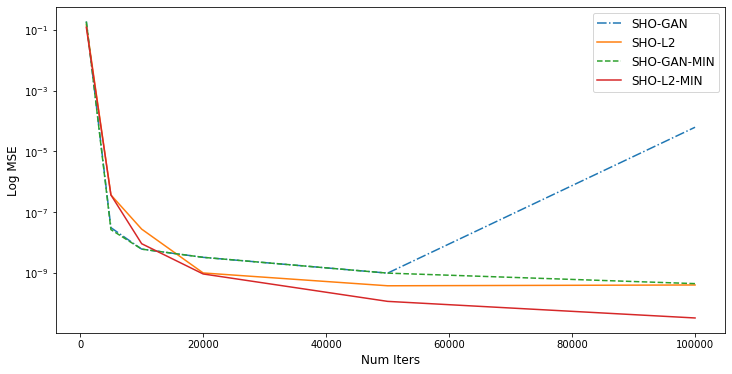

In [63]:
plt.figure(figsize=(12,6))
# plt.plot(niters, mses[0], '--', label='NLO-GAN')
# plt.plot(niters, mses[1], label='NLO-L2')
plt.plot(niters, mses[2], '-.', label='SHO-GAN')
plt.plot(niters, mses[3], label='SHO-L2')
plt.plot(niters, min_mses[0], '--', label='SHO-GAN-MIN')
plt.plot(niters, min_mses[1], label='SHO-L2-MIN')
plt.ylabel('Log MSE')
plt.xlabel('Num Iters')
plt.legend(loc='upper right')
plt.yscale('log')